#ENPM808W Homework 3

Sravya Lenka

**USING 5 LATE DAYS FOR THIS ASSIGNMENT**

#Imports

In [110]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from math import ceil

#Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


#Metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



#Data

In [111]:
train_data = "/content/drive/MyDrive/ENPM808W_Class/HW3/hw3-data/qb.train.csv"
train_df = pd.read_csv(train_data)

test_data = "/content/drive/MyDrive/ENPM808W_Class/HW3/hw3-data/qb.test.csv"
test_df = pd.read_csv(test_data)

In [112]:
metrics_df = pd.DataFrame(columns = ['Model','Features','Accuracy'])

In [113]:
train_df

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0
...,...,...,...,...,...,...,...,...,...,...
8074,13920,51.072087,Lord Peter Wimsey,Snow Country,The author of this work later released a short...,Literature,2009 Buzzerfest,work,False,3
8075,13921,42.298305,Satires (Juvenal),Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,None,False,18
8076,13922,40.570231,Kubla Khan,Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,None,False,8
8077,13923,37.679422,Asgard,Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,abs,False,9


In [114]:
train_df.columns

Index(['row', 'body_score', 'page', 'answer', 'text', 'category',
       'tournaments', 'answer_type', 'corr', 'inlinks'],
      dtype='object')

In [115]:
test_df

,row,body_score,page,text,category,tournaments,answer_type,inlinks
0,31,40.023617,Death in Venice,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,4
1,32,27.538799,The Eye of the World,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,1
2,33,26.976121,Carmilla,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,2
3,88,45.848831,A Passage to India,In a symbolic incident in this novel Ronny Hea...,Literature,2001 ACF Regionals,work,5
4,91,99.811169,The Cherry Orchard,"We first meet Fiers, the aging footman, in Act...",Literature,2001 ACF Regionals,work,11
...,...,...,...,...,...,...,...,...
882,13809,42.610347,A Clockwork Orange,"In chapter 8 of this novel, Block the tradesma...",Literature,2004 ACF Fall,work,20
883,13810,41.330475,Leni Riefenstahl,"In chapter 8 of this novel, Block the tradesma...",Literature,2004 ACF Fall,people,8
884,13862,10.613731,Umberto Eco,One work by this author features the protagoni...,Literature,2009 Buzzerfest,people,31
885,13866,37.628201,God's Bits of Wood,One character in this work is opposed to the c...,Literature,2009 Buzzerfest,work,0


#Understanding the Data

Each line has a guess (page) and a correct answer (answer) given some fraction of the question
revealed so far (text). Your goal is to predict whether they match.
Each guess is the title of a
Wikipedia page.

To get you started, you have the following columns

● row A unique ID for every guess

● body_score A measure of the confidence for how well the text of the Wikipedia page matches the question text

● page The guess produced

● answer The correct answer

● text The text so far revealed (randomly chosen)

● category The category (could be noisy) of the question

● tournaments The tournaments the question was used in

● answer_type The kind of answer of the question (e.g. person, place, work)

● corr Whether the guess (page) was correct or not (i.e., whether it matched “answer”)

● inlinks The number of inlinks on the guessed Wikipedia page

In [116]:
train_df.corr()

<ipython-input-116-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,row,body_score,corr,inlinks
row,1.000000,0.002570,-0.007363,0.021314
body_score,0.002570,1.000000,0.300162,-0.007237
corr,-0.007363,0.300162,1.000000,-0.056628
inlinks,0.021314,-0.007237,-0.056628,1.000000


In [117]:
train_df.isna().sum()

row            0
body_score     0
page           0
answer         0
text           0
category       0
tournaments    0
answer_type    0
corr           0
inlinks        0
dtype: int64

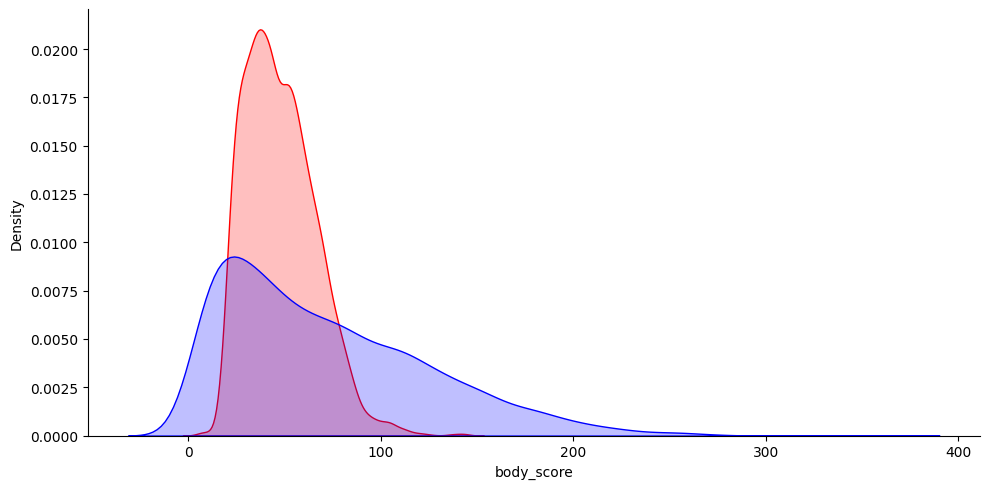

In [118]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'body_score', fill=True)


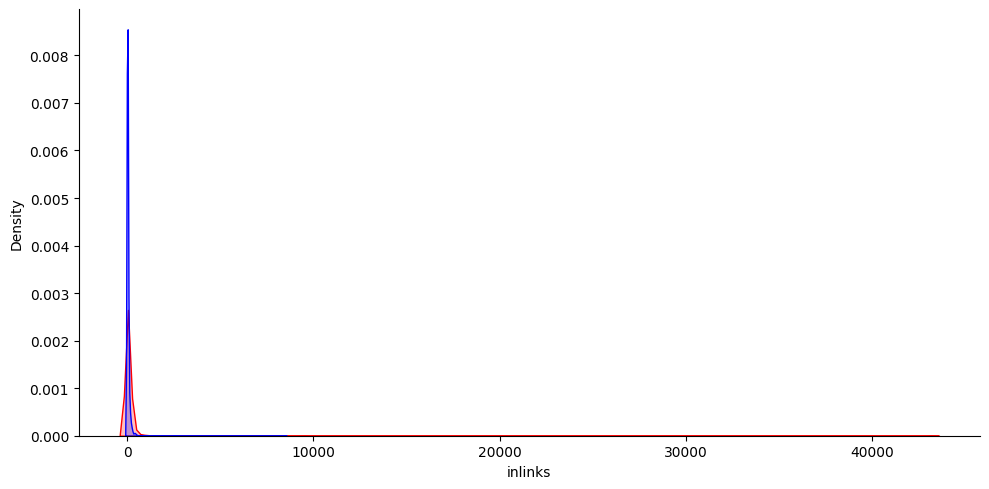

In [119]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'inlinks', fill=True)

#Question 2

Build the best classifier you can with the given data, documenting the choices
that you make.

a. Try using logistic regression, SVM (multiple kernels), and decision trees.
Create a table with your accuracy with each of these methods.

b. Look at where you’re making mistakes. Can you see any patterns?

Columns -  'body_score', 'page', 'answer', 'text', 'category','tournaments', 'answer_type', 'inlinks'

To predict -  'corr'

## One hot encoding

In [120]:
#One hot encoding
train_df_oh = train_df
train_df_oh = pd.concat([train_df_oh, pd.get_dummies(train_df_oh["page"], drop_first=True, prefix="page")], axis=1)
# train_df_oh = pd.concat([train_df_oh, pd.get_dummies(train_df_oh["text"], drop_first=True, prefix="text")], axis=1)
# train_df_oh = pd.concat([train_df_oh, pd.get_dummies(train_df_oh["category"], drop_first=True, prefix="category")], axis=1)
# train_df_oh = pd.concat([train_df_oh, pd.get_dummies(train_df_oh["tournaments"], drop_first=True, prefix="tournaments")], axis=1)
# train_df_oh = pd.concat([train_df_oh, pd.get_dummies(train_df_oh["answer_type"], drop_first=True, prefix="answer_type")], axis=1)
train_df_oh

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks,...,page_Zeami Motokiyo,page_Zechariah (priest),page_Zelda Fitzgerald,page_Zembla (magazine),page_Zeus,page_Zipacna,page_Zombie,page_Zora Neale Hurston,page_Zorba the Greek (film),page_Zuleika Dobson
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62,...,0,0,0,0,0,0,0,0,0,0
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5,...,0,0,0,0,0,0,0,0,0,0
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6,...,0,0,0,0,0,0,0,0,0,0
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22,...,0,0,0,0,0,0,0,0,0,0
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,13920,51.072087,Lord Peter Wimsey,Snow Country,The author of this work later released a short...,Literature,2009 Buzzerfest,work,False,3,...,0,0,0,0,0,0,0,0,0,0
8075,13921,42.298305,Satires (Juvenal),Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,None,False,18,...,0,0,0,0,0,0,0,0,0,0
8076,13922,40.570231,Kubla Khan,Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,None,False,8,...,0,0,0,0,0,0,0,0,0,0
8077,13923,37.679422,Asgard,Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,abs,False,9,...,0,0,0,0,0,0,0,0,0,0


Using too many features didn't help with the model, so using only some text features.

In [121]:
X = train_df_oh.drop(['page','text','category','tournaments','answer_type','answer'],axis = 1)
y = train_df_oh['corr']

Splitting into train and test

In [122]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [123]:
modelClassifiers = {
     'Decision Tree' : DecisionTreeClassifier() ,
     'Logistic Regression' : LogisticRegression() ,
     'SVC' : SVC()
    }

In [124]:
for cmodel, clf in modelClassifiers.items():

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        cnf_matrix = metrics.confusion_matrix(y_test, predictions)
        print(cnf_matrix)
        metrics_df.loc[len(metrics_df) + 1] = [cmodel,X_train.columns,metrics.accuracy_score(y_test, predictions)]

[[1324    0]
 [   0 1100]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[1324    0]
 [   0 1100]]
[[1324    0]
 [1100    0]]


In [125]:
metrics_df

,Model,Features,Accuracy
1,Decision Tree,"Index(['row', 'body_score', 'corr', 'inlinks',...",1.000000
2,Logistic Regression,"Index(['row', 'body_score', 'corr', 'inlinks',...",1.000000
3,SVC,"Index(['row', 'body_score', 'corr', 'inlinks',...",0.546205


## TF-IDF Vectorizer

Note : The commented features are the ones I tried before going with the last set of features

In [126]:
# X=train_df[['body_score', 'page', 'text','inlinks']]
# X = train_df[['body_score', 'page', 'text', 'category','tournaments', 'answer_type', 'inlinks']]
# X = train_df[['body_score', 'page', 'text', 'category', 'answer_type', 'inlinks']]
# X = train_df[['body_score', 'page', 'text', 'answer_type', 'inlinks']]
# X = train_df[['body_score', 'page', 'text', 'inlinks']]
X = train_df[['body_score', 'page', 'text', 'category', 'inlinks']]

y=train_df['corr']


In [127]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [128]:
text_features = ['page', 'text','category']
vectorizer = TfidfVectorizer()
for feature in text_features:
    X_train[feature] = vectorizer.fit_transform(X_train[feature]).toarray()
    X_test[feature] = vectorizer.transform(X_test[feature]).toarray()

In [129]:
modelClassifiers = \
    {
     'Decision Tree' : DecisionTreeClassifier() ,
     'Logistic Regression' : LogisticRegression() ,
     'SVC' : SVC()
}

In [130]:
#Function to store misclassified records, also the right ones, to compare
def storeIntoDataFrame(model, predictions, X_train, X_test, y_test):
    #wrong classification
    mclassified_indices = y_test != predictions
    mclassified_instances = X_test[mclassified_indices]
    true_labels = y_test[mclassified_indices]
    predicted_labels = predictions[mclassified_indices]

    mclassified_df = pd.DataFrame({
    'Model': model,
    'True Class': true_labels,
    'Predicted Class': predicted_labels
    })
    mclassified_df = pd.concat([mclassified_df, mclassified_instances], axis=1)

    #right classification
    classified_indices = y_test == predictions
    classified_instances = X_test[classified_indices]
    true_labels = y_test[classified_indices]
    predicted_labels = predictions[classified_indices]

    classified_df = pd.DataFrame({
    'Model': model,
    'True Class': true_labels,
    'Predicted Class': predicted_labels
    })
    classified_df = pd.concat([classified_df, classified_instances], axis=1)

    return mclassified_df, classified_df


In [131]:
for cmodel, clf in modelClassifiers.items():

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        cnf_matrix = metrics.confusion_matrix(y_test, predictions)
        print(cnf_matrix)
        metrics_df.loc[len(metrics_df) + 1] = [cmodel,X_train.columns,metrics.accuracy_score(y_test, predictions)]
        mclassified_df, classified_df = storeIntoDataFrame(cmodel, predictions, X_train, X_test, y_test)

[[970 381]
 [362 711]]
[[1162  189]
 [ 583  490]]
[[1317   34]
 [ 698  375]]


In [132]:
mclassified_df

,Model,True Class,Predicted Class,body_score,page,text,category,inlinks
7322,SVC,True,False,22.262514,0.0,0.0,1.0,50
2973,SVC,True,False,68.211989,0.0,0.0,1.0,5
7967,SVC,True,False,26.373031,0.0,0.0,1.0,0
5881,SVC,True,False,27.319353,0.0,0.0,1.0,94
5687,SVC,True,False,75.837179,0.0,0.0,1.0,85
...,...,...,...,...,...,...,...,...
1910,SVC,True,False,66.127512,0.0,0.0,1.0,0
7506,SVC,True,False,14.250040,0.0,0.0,1.0,5
5417,SVC,True,False,21.383781,0.0,0.0,1.0,5
5607,SVC,True,False,18.341290,0.0,0.0,1.0,8


In [133]:
classified_df

,Model,True Class,Predicted Class,body_score,page,text,category,inlinks
3687,SVC,False,False,36.745326,0.0,0.0,1.0,2
2711,SVC,False,False,60.827879,0.0,0.0,1.0,160
7383,SVC,True,True,93.207993,0.0,0.0,1.0,20
3034,SVC,False,False,40.608707,0.0,0.0,1.0,130
6687,SVC,True,True,108.672821,0.0,0.0,1.0,21
...,...,...,...,...,...,...,...,...
1350,SVC,True,True,149.433733,0.0,0.0,1.0,0
1847,SVC,True,True,143.415039,0.0,0.0,1.0,22
1010,SVC,False,False,78.731255,0.0,0.0,1.0,85
5100,SVC,False,False,61.092134,0.0,0.0,1.0,22


## 2a. Try using logistic regression, SVM (multiple kernels), and decision trees. Create a table with your accuracy with each of these methods.

In [134]:
metrics_df

,Model,Features,Accuracy
1,Decision Tree,"Index(['row', 'body_score', 'corr', 'inlinks',...",1.000000
2,Logistic Regression,"Index(['row', 'body_score', 'corr', 'inlinks',...",1.000000
3,SVC,"Index(['row', 'body_score', 'corr', 'inlinks',...",0.546205
4,Decision Tree,"Index(['body_score', 'page', 'text', 'category...",0.693482
5,Logistic Regression,"Index(['body_score', 'page', 'text', 'category...",0.681518
6,SVC,"Index(['body_score', 'page', 'text', 'category...",0.698020


##2b. Look at where you’re making mistakes. Can you see any patterns?

Initially, I started out with One hot encoding for the text columns, but that increased the features exponentially and is an overfit(100%). So, I used TF-IDF vectorizer and used the features to improve model performance and accuracy.

After looking at the wrong and right classifications of the text - The feature "tournament" affected the model's accuracy, but a combination of other features does not change the accuracy by a lot. After checking on combinations and correlation - the best features for this model are body_score', 'page', 'text', 'category', 'inlinks'.

The best model is SVM with features**(body_score', 'page', 'text', 'category', 'inlinks')**- and accuracy of 69.8%

# Question 3

Find additional information you can use to improve predictions. Be creative.
Look for features you can extract from the data that you have. NOTE: To get credit for
this, you need to have an idea and evaluate it. You will get full credit for a well-thought
out feature that doesn’t improve performance.

a. Create a plot that explains why this information is useful for making
predictions (e.g. create a facet graph showing the distribution for correct

and incorrect). Turn this in as “plot.pdf”.

b. How much does this feature improve your classification?

Since I haven't used answer_type and tournaments in my model, I wanted to understand how they affect the correctness.



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


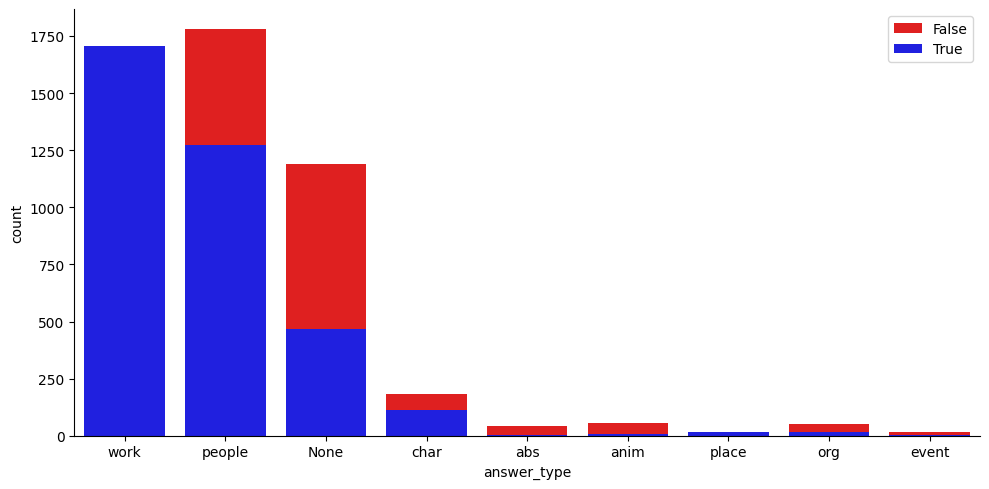

In [135]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.countplot, 'answer_type')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


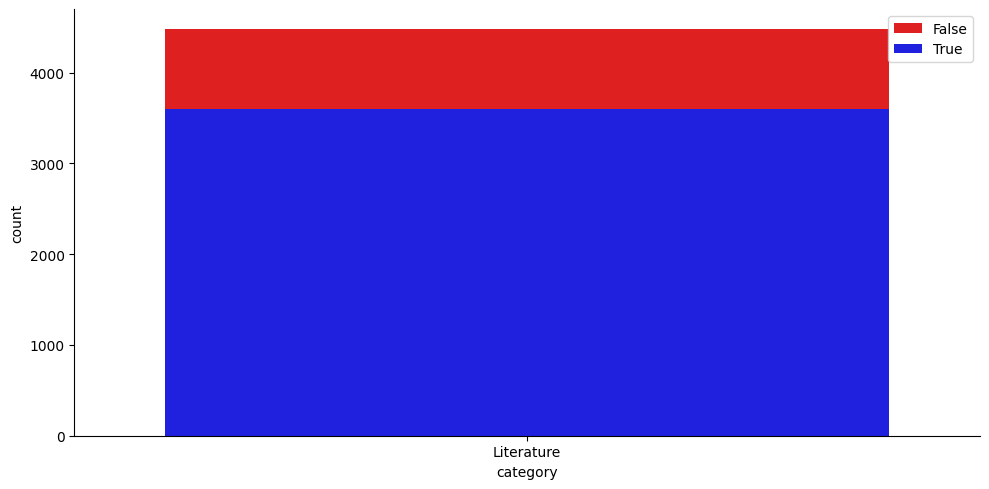

In [136]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.countplot, 'category')
plt.legend()
plt.show()

In [137]:
train_df[['year','name_tournament']] = train_df['tournaments'].str.split(" ", 1, expand=True)


<ipython-input-137-2d0dea2f0b5d>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_df[['year','name_tournament']] = train_df['tournaments'].str.split(" ", 1, expand=True)


In [138]:
train_df["year"].astype('int32')
train_df["year"] = pd.to_datetime(train_df["year"], format = '%Y').dt.year
# train_df["year"] = train_df["year"].dt.year

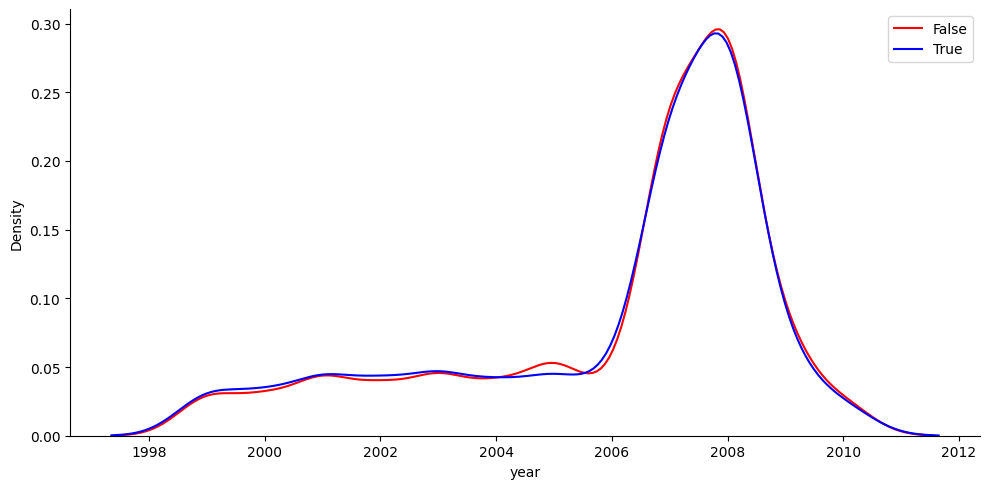

In [139]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'year')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


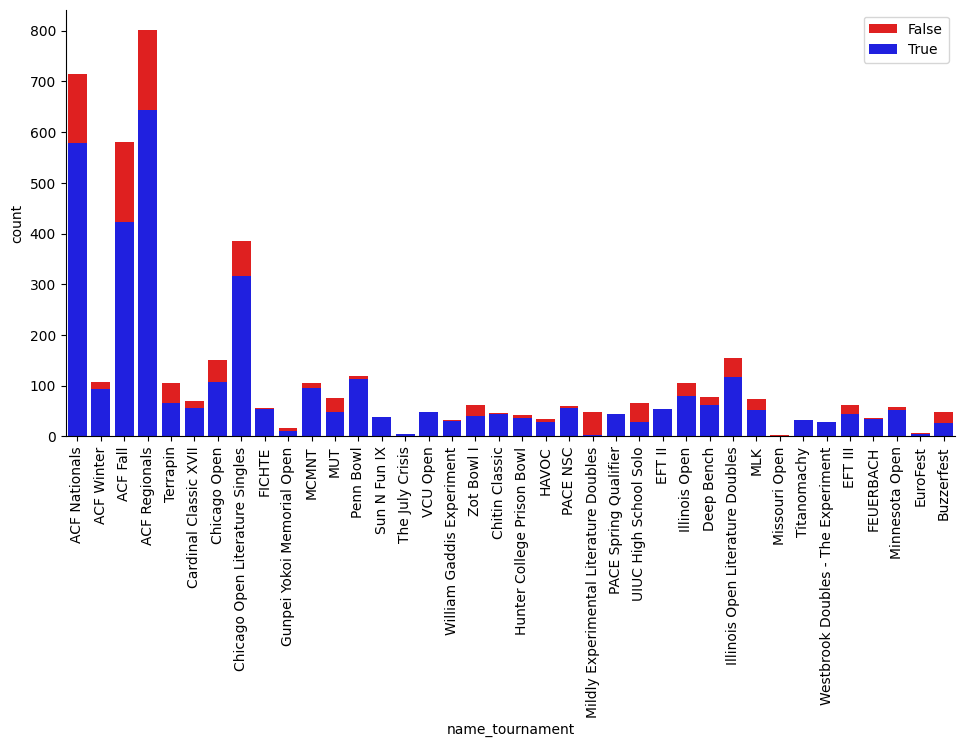

In [140]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.countplot, 'name_tournament')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [141]:
train_df['ceil_body_score'] = train_df['body_score'].apply(lambda x: ceil(x))

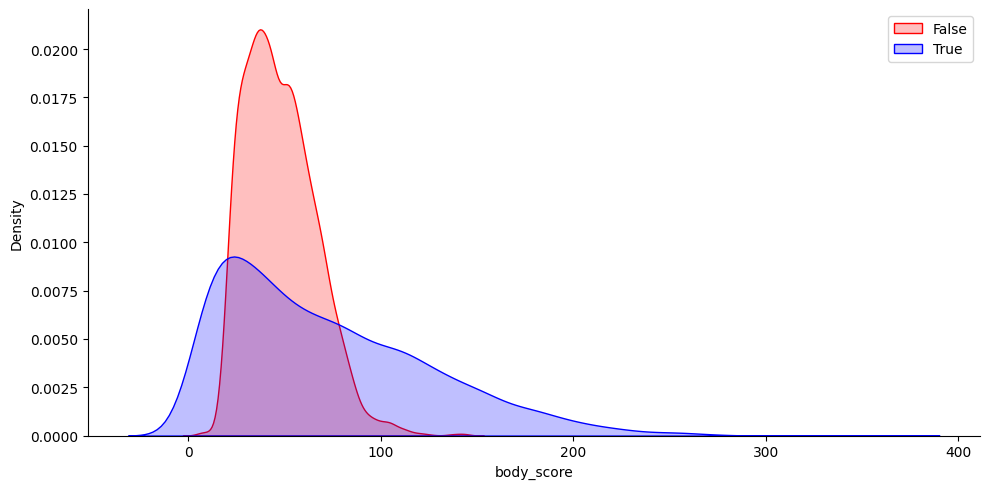

In [142]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'body_score', fill=True)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


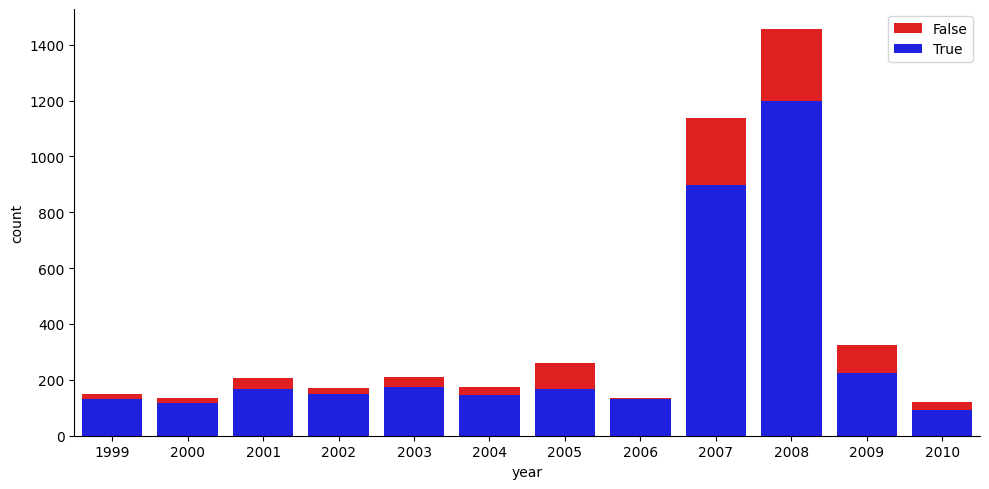

In [143]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.countplot, 'year', fill=True)
plt.legend()
plt.show()

In [144]:
train_df.isna().sum()

row                0
body_score         0
page               0
answer             0
text               0
category           0
tournaments        0
answer_type        0
corr               0
inlinks            0
year               0
name_tournament    0
ceil_body_score    0
dtype: int64

using features ceil_body_score and name_tournament keeping other features as Q2


In [145]:
X=train_df[['ceil_body_score', 'page', 'text','inlinks','category','name_tournament']]
y=train_df['corr']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [146]:
text_features = ['page', 'text','category','name_tournament']
vectorizer = TfidfVectorizer()
for feature in text_features:
    X_train[feature] = vectorizer.fit_transform(X_train[feature]).toarray()
    X_test[feature] = vectorizer.transform(X_test[feature]).toarray()

In [147]:
modelClassifiers = \
    {
     'Decision Tree' : DecisionTreeClassifier() , \
     'Logistic Regression' : LogisticRegression() , \
     'SVC' : SVC() \
}

In [148]:
for cmodel, clf in modelClassifiers.items():

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        print(metrics.accuracy_score(y_test, predictions))

0.6951320132013201
0.6765676567656765
0.6823432343234324


In [149]:
#using feature name_tourname keeping other features as Q2

X=train_df[['body_score', 'page', 'text','inlinks','category','name_tournament']]
y=train_df['corr']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

text_features = ['page', 'text','category','name_tournament']
vectorizer = TfidfVectorizer()
for feature in text_features:
    X_train[feature] = vectorizer.fit_transform(X_train[feature]).toarray()
    X_test[feature] = vectorizer.transform(X_test[feature]).toarray()

for cmodel, clf in modelClassifiers.items():

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        print(metrics.accuracy_score(y_test, predictions))


0.6885313531353136
0.6860561056105611
0.698019801980198


In [150]:
#using feature ceil_body_score keeping other features as Q2

X=train_df[['ceil_body_score', 'page', 'text','inlinks','category']]
y=train_df['corr']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

text_features = ['page', 'text','category']
vectorizer = TfidfVectorizer()
for feature in text_features:
    X_train[feature] = vectorizer.fit_transform(X_train[feature]).toarray()
    X_test[feature] = vectorizer.transform(X_test[feature]).toarray()

for cmodel, clf in modelClassifiers.items():

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        print(metrics.accuracy_score(y_test, predictions))


0.7136963696369637
0.6811056105610561
0.6761551155115512


##3a. Create a plot that explains why this information is useful for making predictions (e.g. create a facet graph showing the distribution for correct and incorrect). Turn this in as “plot.pdf”.

Along with the features used for Q2, I used name of the tournament(split from the "tournament" feature), along with ceil_body_score to convert the float and round it up to the nearest integer.

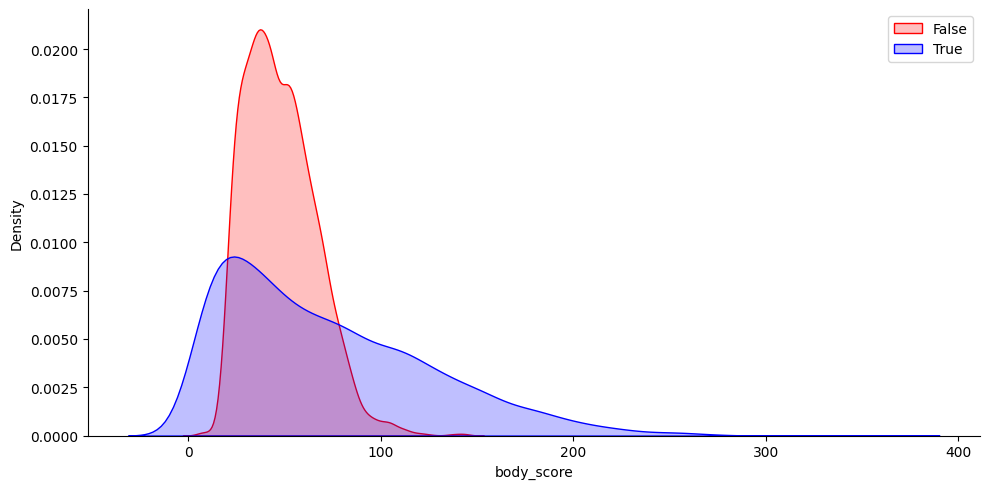

In [151]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'body_score', fill=True)

plt.legend()
plt.show()

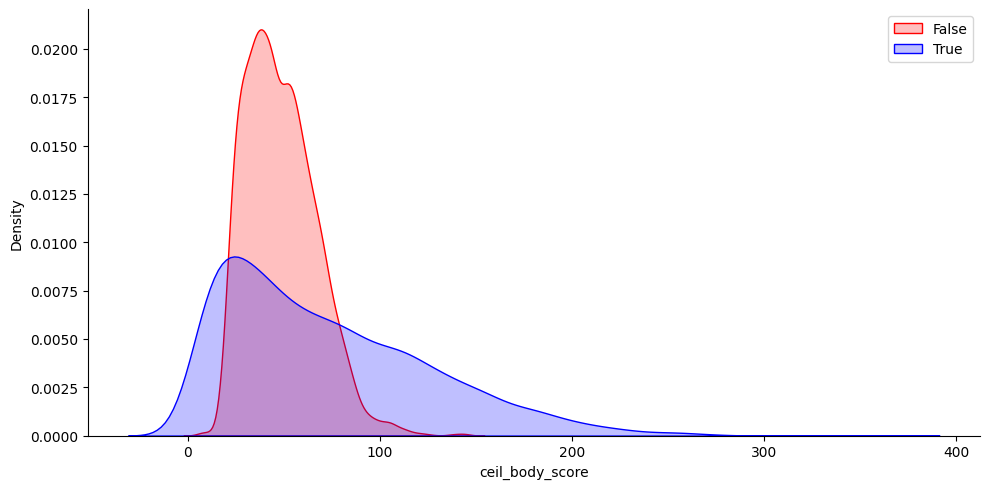

In [152]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'ceil_body_score', fill=True)

plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


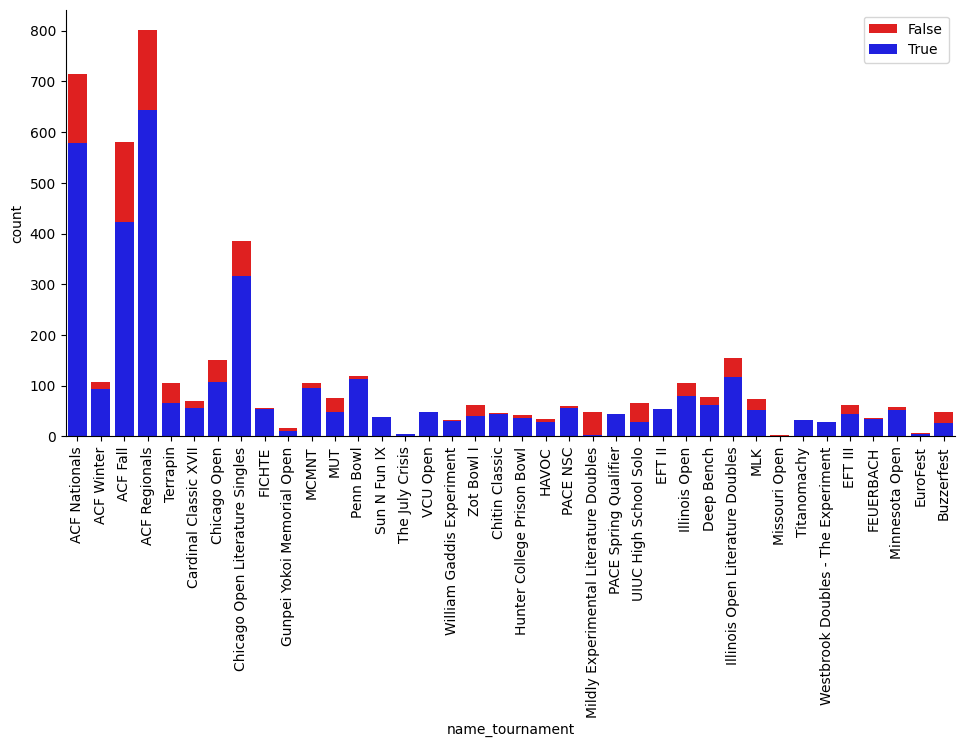

In [153]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.countplot, 'name_tournament')
plt.xticks(rotation=90)
plt.legend()
plt.show()

##3b. How much does this feature improve your classification?

1. Best model - DT - Only using "ceil_body_score" increased accuracy from to 69.4% to 71.36%.
2. Best model - DT - Only using "name_tournament" didn't change the accuracy(69.8%).
3. Using both of the new features, the best model is now Decision Tree and the accuracy decreased from 69.8% to 69.5%

# Question 4

Challenge: Build a classifier that best predicts correct answers in this dataset.
Upload your predictions to Kaggle. (note that you must use your UMD e-mail to get
access to this competition). If your UMD username is JSMITH, use JSMITH_DID as
your username on Kaggle. You are welcome to use any additional data you care to use
so long as they are not from quiz bowl questions.

a. Provide your final score and username
b. Create an error analysis of your final classifier. Turn this in as “error.pdf”.
An error analysis must contain real examples of your data, not just an error
matrix.

A good error analysis must contain examples from the development set that you
get wrong. You should show those sentences and explain why (in terms of
features or the model) they have the wrong answer.
You should have been doing this all along as your derive new features (e.g., 2b),
but this is your final inspection of your errors. The feature or model problems you
discover should not be trivial features you could add easily. Instead, these
should be features or models that are difficult to correct.
An error analysis is not the same thing as simply presenting the error matrix, as it
does not inspect any individual examples.

I also included features discussed in the class to improve the model!

In [154]:
train_df['disambiguation'] = train_df['page'].apply(lambda x: 1 if '(' in x else 0)
constant = 1e-10
train_df['log_inlinks'] = np.log(train_df['inlinks'] + constant)
train_df['length_text'] = train_df['text'].apply(lambda x: len(x))
train_df['ceil_body_score'] = train_df['body_score'].apply(lambda x: ceil(x))

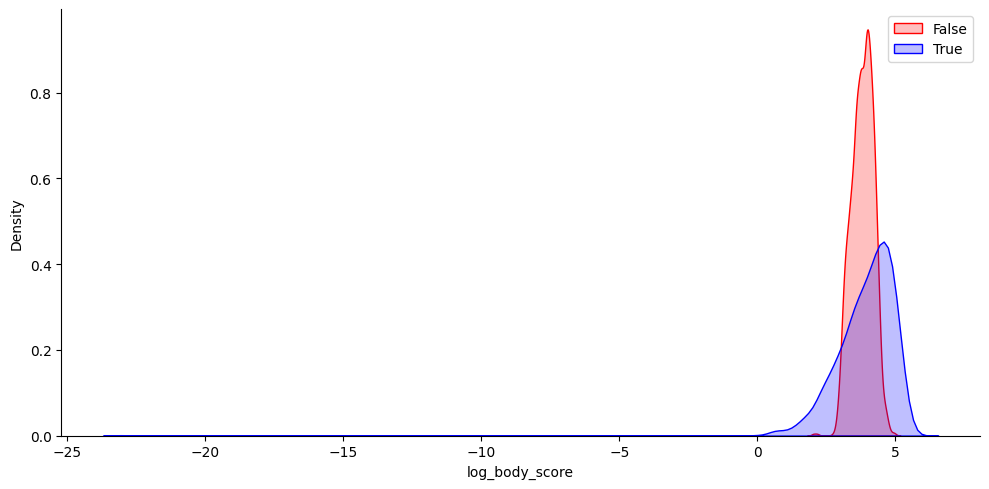

In [155]:
constant = 1e-10
train_df['log_body_score'] = np.log(train_df['body_score'] + constant)
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'log_body_score', fill=True)

plt.legend()
plt.show()

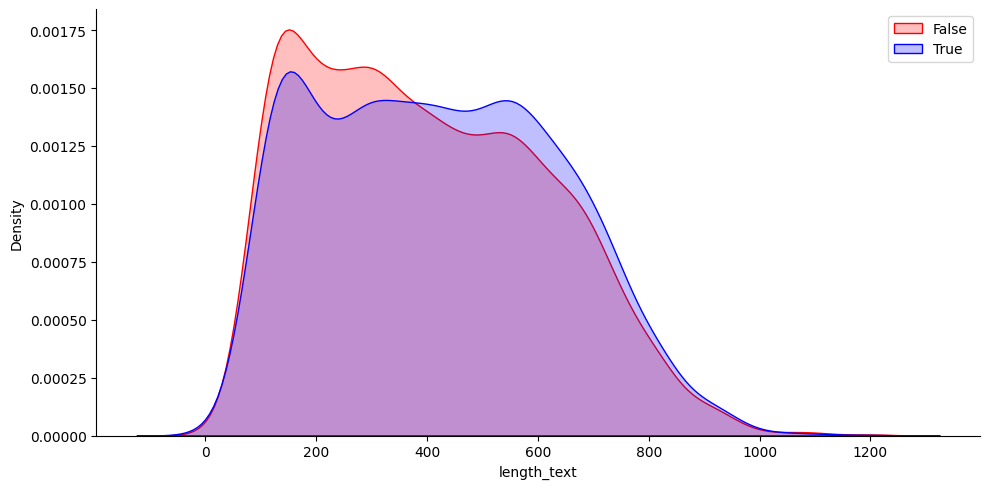

In [156]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'length_text', fill=True)
plt.legend()
plt.show()

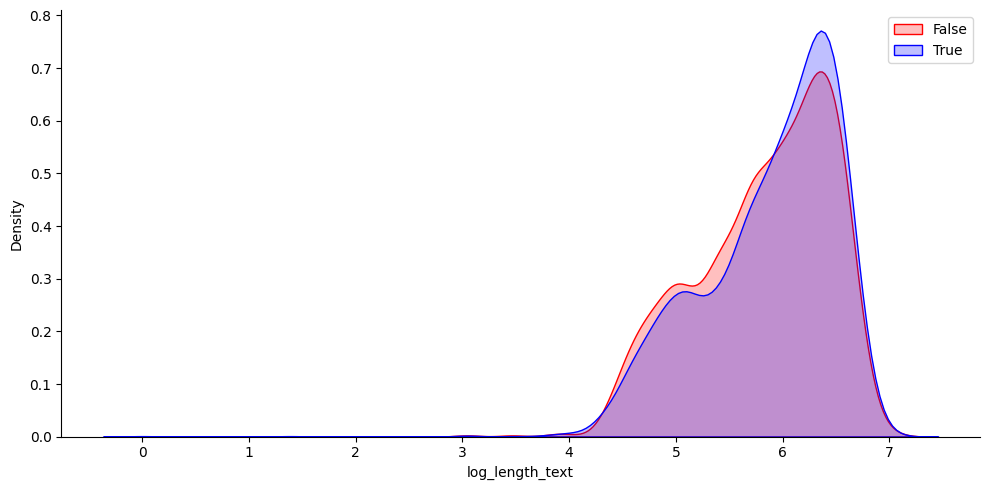

In [157]:
constant = 1e-10
train_df['log_length_text'] = np.log(train_df['length_text'] + constant)
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'log_length_text', fill=True)

plt.legend()
plt.show()

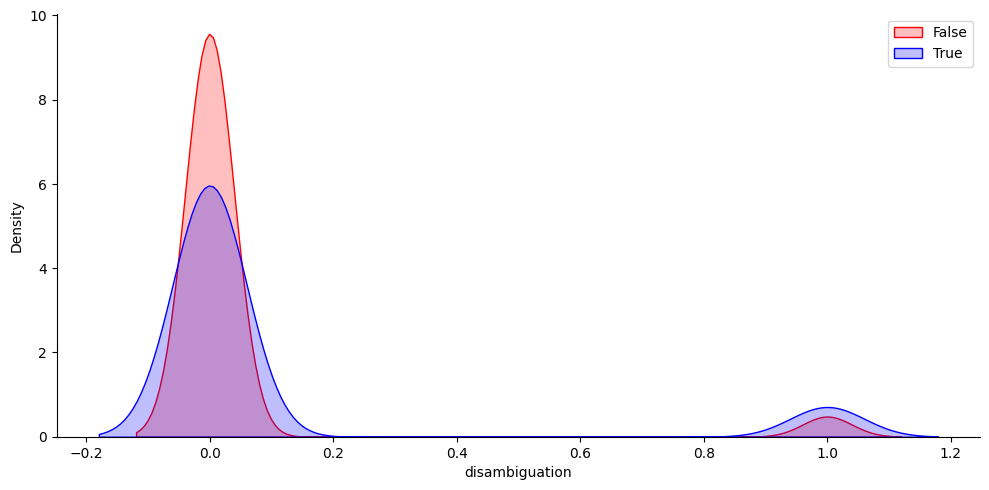

In [158]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'disambiguation', fill=True)

plt.legend()
plt.show()

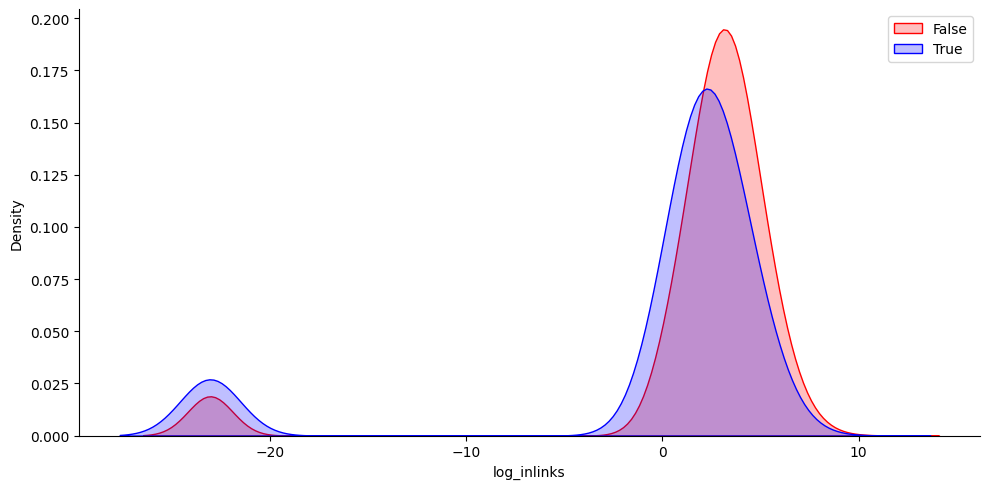

In [159]:
g = sns.FacetGrid(train_df, hue='corr', height=5, aspect=2, palette={True: 'blue', False: 'red'})

g.map(sns.kdeplot, 'log_inlinks', fill=True)
plt.legend()
plt.show()

In [160]:
X=train_df[['ceil_body_score','log_inlinks','disambiguation','length_text','page', 'text','answer_type']]
y=train_df['corr']

In [161]:
train_df.isna().sum()

row                0
body_score         0
page               0
answer             0
text               0
category           0
tournaments        0
answer_type        0
corr               0
inlinks            0
year               0
name_tournament    0
ceil_body_score    0
disambiguation     0
log_inlinks        0
length_text        0
log_body_score     0
log_length_text    0
dtype: int64

In [162]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [163]:
text_features = ['page', 'text','answer_type']
vectorizer = TfidfVectorizer()
for feature in text_features:
    X_train[feature] = vectorizer.fit_transform(X_train[feature]).toarray()
    X_test[feature] = vectorizer.transform(X_test[feature]).toarray()

##Checking for best model

In [164]:
bm_metrics_df = pd.DataFrame(columns = ['Model','Features','Accuracy'])

In [165]:
modelClassifiers = \
    {'bayes': GaussianNB() , \
     'rf' : RandomForestClassifier() , \
     'gb' : GradientBoostingClassifier() , \
     'dt' : DecisionTreeClassifier() , \
     'lr' : LogisticRegression() , \
     'knn' : KNeighborsClassifier() , \
     'svc' : SVC() \
}

In [166]:
for cmodel, clf in modelClassifiers.items():

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        print(metrics.accuracy_score(y_test, predictions))
        bm_metrics_df.loc[len(bm_metrics_df) + 1] = [cmodel,X_train.columns,metrics.accuracy_score(y_test, predictions)]

0.7042079207920792
0.8094059405940595
0.8234323432343235
0.7603135313531353
0.7124587458745875
0.7945544554455446
0.6992574257425742


In [167]:
bm_metrics_df

,Model,Features,Accuracy
1,bayes,"Index(['ceil_body_score', 'log_inlinks', 'disa...",0.704208
2,rf,"Index(['ceil_body_score', 'log_inlinks', 'disa...",0.809406
3,gb,"Index(['ceil_body_score', 'log_inlinks', 'disa...",0.823432
4,dt,"Index(['ceil_body_score', 'log_inlinks', 'disa...",0.760314
5,lr,"Index(['ceil_body_score', 'log_inlinks', 'disa...",0.712459
6,knn,"Index(['ceil_body_score', 'log_inlinks', 'disa...",0.794554
7,svc,"Index(['ceil_body_score', 'log_inlinks', 'disa...",0.699257


##Best Model

In [168]:
X_train_bm=train_df[['ceil_body_score', 'page', 'text','log_inlinks','disambiguation','length_text','answer_type']]
y_train_bm=train_df['corr']

In [169]:
X_train_bm.columns

Index(['ceil_body_score', 'page', 'text', 'log_inlinks', 'disambiguation',
       'length_text', 'answer_type'],
      dtype='object')

In [170]:
test_df['disambiguation'] = test_df['page'].apply(lambda x: 1 if '(' in x else 0)
constant = 1e-10
test_df['log_inlinks'] = np.log(test_df['inlinks'] + constant)
test_df['length_text'] = test_df['text'].apply(lambda x: len(x))
test_df['ceil_body_score'] = test_df['body_score'].apply(lambda x: ceil(x))

In [171]:
X_test_bm = test_df[['ceil_body_score', 'page', 'text','log_inlinks','disambiguation','length_text','answer_type']]

In [172]:
text_features = ['page', 'text','answer_type']
vectorizer = TfidfVectorizer()
for feature in text_features:
    X_train_bm[feature] = vectorizer.fit_transform(X_train_bm[feature]).toarray()
    X_test_bm[feature] = vectorizer.transform(X_test_bm[feature]).toarray()

<ipython-input-172-b8315b7ddb07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_bm[feature] = vectorizer.fit_transform(X_train_bm[feature]).toarray()
<ipython-input-172-b8315b7ddb07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_bm[feature] = vectorizer.transform(X_test_bm[feature]).toarray()


In [173]:
model = GradientBoostingClassifier()

model.fit(X_train_bm, y_train_bm)
y_pred_bm = model.predict(X_test_bm)

In [174]:
#Submission

kaggle_submission = pd.DataFrame({'row': test_df['row'], 'corr': y_pred_bm})

# Save the predictions to a CSV file
kaggle_submission.to_csv('quiz_bowl_pred.csv', index=False)

## 4a. Provide your final score and username

**Features** - 'ceil_body_score', 'page', 'text', 'log_inlinks', 'disambiguation', 'length_text', 'answer_type'

**Accuracy** - 81.8%

Username - sravyal96(Sravya Lenka)



##4b. Create an error analysis of your final classifier. Turn this in as “error.pdf”. An error analysis must contain real examples of your data, not just an error matrix.

A good error analysis must contain examples from the development set that you get wrong. You should show those sentences and explain why (in terms of features or the model) they have the wrong answer. You should have been doing this all along as your derive new features (e.g., 2b), but this is your final inspection of your errors. The feature or model problems you discover should not be trivial features you could add easily. Instead, these should be features or models that are difficult to correct. An error analysis is not the same thing as simply presenting the error matrix, as it does not inspect any individual examples.

In [175]:
X=train_df[['ceil_body_score', 'page', 'text','log_inlinks','disambiguation','length_text','answer_type']]
y=train_df['corr']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

X_train_dup = X_train.copy()
X_test_dup = X_test.copy()


In [176]:

text_features = ['page', 'text','answer_type']
vectorizer = TfidfVectorizer()
for feature in text_features:
    X_train[feature] = vectorizer.fit_transform(X_train[feature]).toarray()
    X_test[feature] = vectorizer.transform(X_test[feature]).toarray()

model = GradientBoostingClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
#Using the function I defined for Question 3 to get the right & wrong classifications
#toreIntoDataFrame(model, predictions, X_train, X_test, y_test)
mclassified_df, classified_df = storeIntoDataFrame("Gradient Boosting Classifier", y_pred, X_train_dup, X_test_dup, y_test)


[[1249   85]
 [ 355  735]]


In [177]:
mclassified_df

,Model,True Class,Predicted Class,ceil_body_score,page,text,log_inlinks,disambiguation,length_text,answer_type
7380,Gradient Boosting Classifier,True,False,72,Death in Venice,Although this works main character is compared...,1.386294e+00,0,570,work
3952,Gradient Boosting Classifier,True,False,41,Henry Fielding,One of his heroines is the wife of the soldier...,3.761200e+00,0,378,people
3505,Gradient Boosting Classifier,False,True,92,Animal Farm,This author wrote about an insurance clerk nam...,4.060443e+00,0,699,work
3210,Gradient Boosting Classifier,True,False,43,George Gissing,"Human Odds and Ends, a collection of short sto...",1.609438e+00,0,119,people
3369,Gradient Boosting Classifier,True,False,36,R.U.R.,"Its minor characters include Mr. Fabry, Dr. Ha...",2.302585e+00,0,72,work
...,...,...,...,...,...,...,...,...,...,...
6348,Gradient Boosting Classifier,True,False,45,Death in Venice,The main character of this work gets a desire ...,1.386294e+00,0,375,work
2310,Gradient Boosting Classifier,True,False,23,A Shropshire Lad,One section of this work concludes with the ex...,-2.302585e+01,0,134,work
2426,Gradient Boosting Classifier,True,False,31,The Fable of the Bees,"""Millions endeavoring to supply / Each other's...",1.000000e-10,0,271,work
3770,Gradient Boosting Classifier,False,True,74,Oxfordian theory of Shakespeare authorship,"He wrote about a place in which ""Fat caterpill...",2.890372e+00,0,556,None


In [178]:
classified_df

,Model,True Class,Predicted Class,ceil_body_score,page,text,log_inlinks,disambiguation,length_text,answer_type
1596,Gradient Boosting Classifier,True,True,13,The Courtship of Miles Standish,The title character has a sword of Damascus ha...,1.000000e-10,0,427,None
7152,Gradient Boosting Classifier,False,False,57,Dracula,"The epilogue begins with a game of checkers, a...",3.850148e+00,0,612,work
7106,Gradient Boosting Classifier,False,False,29,The Rime of the Ancient Mariner,The critic Robert Dupree relates this poem to ...,2.772589e+00,0,190,None
3868,Gradient Boosting Classifier,False,False,29,Arabian mythology,"He is called a ""squidgy-nosed old idol"" and ""w...",3.871201e+00,0,235,None
3103,Gradient Boosting Classifier,False,False,77,Gothic fiction,The most annoying character in this novel is t...,5.963579e+00,0,613,work
...,...,...,...,...,...,...,...,...,...,...
602,Gradient Boosting Classifier,False,False,44,A Scanner Darkly,This novel ends with the birth of a girl whose...,1.945910e+00,0,298,work
7560,Gradient Boosting Classifier,False,False,24,Poetic Edda,Many scholars argue that the working title of ...,4.043051e+00,0,99,None
1084,Gradient Boosting Classifier,True,True,8,The Metamorphosis,One strange fondness of the protagonist of thi...,3.663562e+00,0,71,work
6058,Gradient Boosting Classifier,True,True,102,Erewhon,One chapter of this work relates the story of ...,6.931472e-01,0,826,work


Examples of mis-classified texts

In [179]:
classified_df.describe(include='all')

,Model,True Class,Predicted Class,ceil_body_score,page,text,log_inlinks,disambiguation,length_text,answer_type
count,1984,1984,1984,1984.000000,1984,1984,1984.000000,1984.000000,1984.000000,1984
unique,1,2,2,NaN,1392,1558,NaN,NaN,NaN,9
top,Gradient Boosting Classifier,False,False,NaN,Kubla Khan,At one point in this novel a woman is comforte...,NaN,NaN,NaN,people
freq,1984,1249,1249,NaN,18,4,NaN,NaN,NaN,745
mean,NaN,NaN,NaN,60.868952,NaN,NaN,1.280994,0.070060,413.399194,NaN
std,NaN,NaN,NaN,42.329793,NaN,NaN,6.465759,0.255313,216.199766,NaN
min,NaN,NaN,NaN,2.000000,NaN,NaN,-23.025851,0.000000,21.000000,NaN
25%,NaN,NaN,NaN,32.000000,NaN,NaN,1.386294,0.000000,228.000000,NaN
50%,NaN,NaN,NaN,50.000000,NaN,NaN,2.772589,0.000000,398.000000,NaN
75%,NaN,NaN,NaN,75.000000,NaN,NaN,3.850148,0.000000,588.000000,NaN


In [180]:
mclassified_df.describe(include="all")

,Model,True Class,Predicted Class,ceil_body_score,page,text,log_inlinks,disambiguation,length_text,answer_type
count,440,440,440,440.000000,440,440,440.000000,440.000000,440.000000,440
unique,1,2,2,NaN,391,428,NaN,NaN,NaN,6
top,Gradient Boosting Classifier,True,False,NaN,Kubla Khan,He describes using the advance money from an e...,NaN,NaN,NaN,people
freq,440,355,355,NaN,5,3,NaN,NaN,NaN,192
mean,NaN,NaN,NaN,51.495455,NaN,NaN,0.757268,0.059091,384.895455,NaN
std,NaN,NaN,NaN,20.816368,NaN,NaN,6.939761,0.236063,201.843413,NaN
min,NaN,NaN,NaN,17.000000,NaN,NaN,-23.025851,0.000000,55.000000,NaN
25%,NaN,NaN,NaN,35.000000,NaN,NaN,1.386294,0.000000,217.750000,NaN
50%,NaN,NaN,NaN,47.000000,NaN,NaN,2.302585,0.000000,345.500000,NaN
75%,NaN,NaN,NaN,65.000000,NaN,NaN,3.617585,0.000000,532.000000,NaN


Comparing the classifications which are right with the wrong classifications - the false positives and false negatives occured, I believe, because of the overlap of features which is even visible from the previous facet-graphs when feature(s) is not a clear identifier of what the class must be.

Considering couple of misclassified instances:

```
true (True class)

false (Predicted class)

34 (ceil_body_score)

Arthur Rimbaud (page)

This poet expressed the sentiment "For I is an other" in a poem in which he called Baudelaire a true god and described all previous poetry as "rhymed prose".	(text)

4.234106504598708(log_inlinks)

0(disambiguation)

157	(length_text)

people(answer_type)

```

There is a lot of overlap area and not very evident about the right class. I am assuming the weight is given to the no of instances of the class which are high.

Similarly, the following cases -
```
1433,Gradient Boosting Classifier,TRUE,FALSE,46,The Heart Is a Lonely Hunter,"Portia is a servant in the house of the protagonist, who prizes her dead friend's radio at the end of this novel.	Another character works at a flying jenny show and eats at the New York Caf.	One narrative is that of Willie, the criminal son of Dr. Copeland, the only black doctor in town.",1.00E-10,0,288,work

730,Gradient Boosting Classifier,TRUE,FALSE,80,R. K. Narayan,"This author claims to be a heretic in this land of football worshippers during his travels through America recounted in his memoir, My Dateless Diary.	In one of his short stories, a palm-reader informs his last client of the day, that the man who had tried to kill him four months ago was now dead, though we discover that the palm-reader was actually the assailant.	In addition to An Astrologers Day, he wrote a novel in which Dr. Pal manufactures a horoscope for the titular professional, who believes money alone is important in this world, The Financial Expert.	In another of his novels, Raju is mistaken for a swami by Velan, while another involves Jagan, the owner of a candy store.",2.302585093,0,688,people

5500,Gradient Boosting Classifier,FALSE,TRUE,79,Animal Farm,"The Left Book Club commissioned this author's description of northern England living conditions in The Road to Wigan Pier.	He wrote about George Bowling contemplating the approaching Word War II in Coming up for Air, and his time in a certain country led to his account of ""Shooting an Elephant"" and his first novel, Burmese Days.	He is better known for a work in which Mr. Jones and Mr. Frederick represent the leaders of Russia and Germany to characters like Boxer, Old Major, and Napoleon.",4.060443011,0,492,work
```
